In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

# IMAGE OPERATION

### Binarization

In [2]:
def gray2bin(img, threshold = 100):
    binarized = 1.0 * (img == threshold)
    return binarized

### calculate radon

In [3]:
from skimage.transform import radon

def discrete_radon_transform(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta, circle=True)
    return sinogram

### Circule draw

In [4]:
def circle(img, center_coordinates, radius=5, color=0, lineThickness=2): 
    return cv2.circle(img, center_coordinates, radius, color, lineThickness) 

#### Convert to PNG

In [5]:
# from PIL import Image
# for i in path_image:
#     im = Image.open('./image/' + i)
#     im.save('./image/png/' + i[:-4] + '.png')

In [6]:
image_data_set = np.array(listdir('image/png/'))
files          = np.array(listdir('Flickr'))

# Make data set

170 258


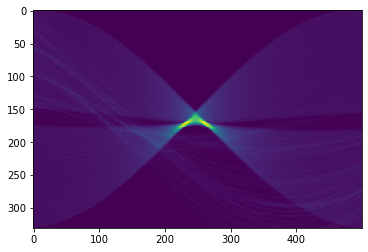

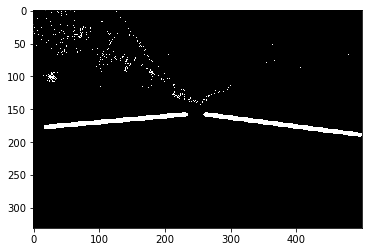

120 169


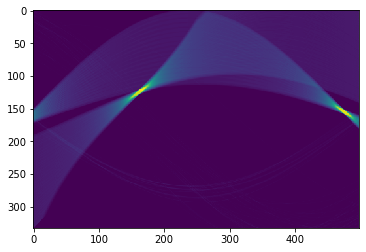

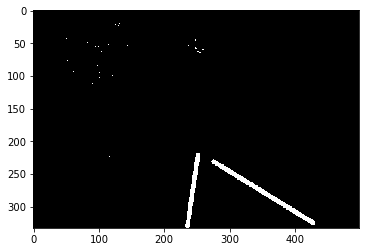

158 112


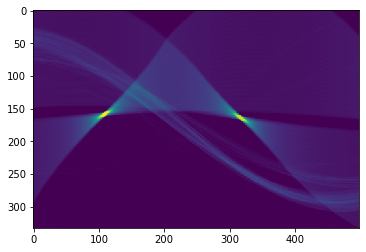

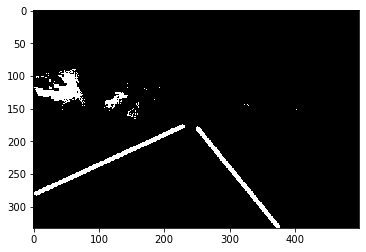

102 380


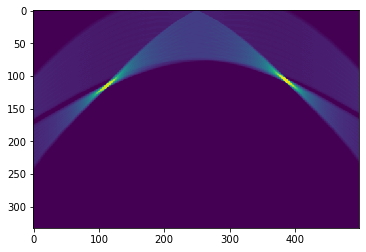

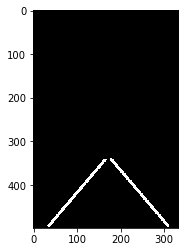

148 293


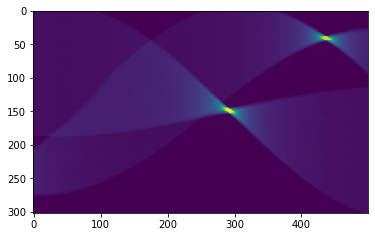

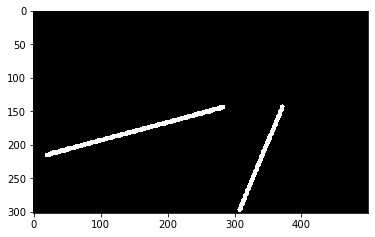

123 384


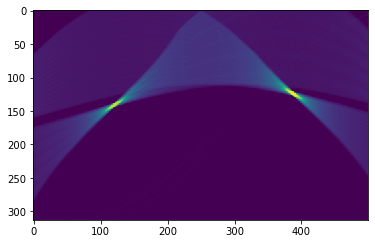

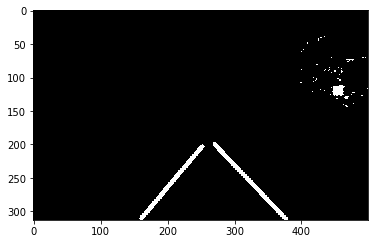

176 429


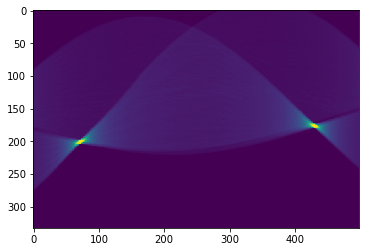

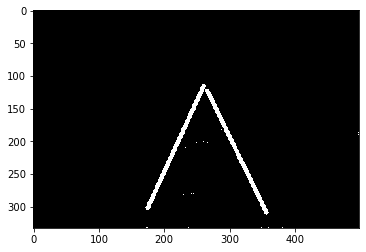

167 370


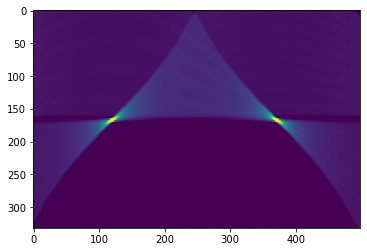

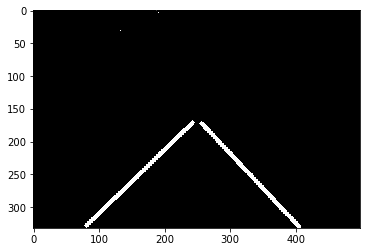

In [27]:
ids = [img_id[:-4] for img_id in image_data_set]
lineThickness = 5

l = []

for file in files[:50]:
    if file[:-4] in ids:
        
        f   = open('./Flickr/' + file, 'r').read().split()
        f   = [int(float(x)) for x in f]
        
        img = cv2.imread('./image/png/' + file[:-3] + 'png', 0)        
        img = cv2.line(img, (f[2], f[3]), (f[4], f[5]), 255, lineThickness)
        img = cv2.line(img, (f[6], f[7]), (f[8], f[9]), 255, lineThickness)
        img = gray2bin(img, 255)
        
        
        radon_img = discrete_radon_transform(img)
        i, j = np.unravel_index(np.argmax(radon_img), radon_img.shape) 
        print(i, j)
             
        plt.imshow(radon_img)
        plt.show()    

        plt.imshow(img, cmap='gray')
        plt.show()